Group: 008-31

Members: Matthew Choi, Elizaveta Lazareva, Bianca Swartz, Vicky Yang

# Predicting Newsletter Subscription Using Player Demographics and Gameplay Behavior

## Introduction

### Background

In this project, we investigate a real dataset collected by a research group in the Computer Science department at UBC. The team operates a custom Minecraft research server where player activity is recorded. The goal of the project is to help the research group understand player behaviour, manage resources, and target recruitment efforts more effectively. 

The server collects data about each player's demographic information as well as their in-game behaviour. Understanding how players interact with the server has practical importance. It affects decisions such as when to allocate server resources, what types of players are most valuable to recruit, and what characteristics are associated with certain behaviors such as subscribing to project newsletters.

### Question

In this report, our group has chosen to address the following specific question:

**Can a player's age, gender, experience level, total playtime, number of sessions, and average session duration be used to predict whether they subscribe to the newsletter or not?**

The aim of the question is to determine which features of a player (such as age, gender, experience, number of sessions, total playtime, and other behavioural summaries) are useful for predicting whether the player subscribed to the newsletter. Being able to predict this provides insight into which groups of players show more engagement with the project, which can help guide future outreach and recruitment strategies.

### Dataset Description

Two datasets are used in this project: **players.csv and sessions.csv**

#### Players.csv
The **players.csv** file consists of 196 observations and has the following variables:
|Variable Name|Variable Type|Variable Meaning|
|-------------|-------------|----------------|
|experience|chr|This variable indicates the experience level of the individual player described using 5 categories: Amateur, Beginner, Pro, Regular and Veteran|
|subscribed|lgl|This variable indicates whether or not the individual player is subscribed or not|
|hashedEmail|chr|This variable is the individual's hashed email|
|played_hours|dbl|This variable reports the amount of hours played on MineCraft by each individual|
|name|chr|This variable reports each indidivual player's name|
|gender|chr|This variable reports each individual player's gender|
|Age|dbl|This variable reports each individual player's age|

And the following summary statistics:
|Variable|Summary|
|--------|----|
|experience|In summary, this dataset has 63 amateur players, 35 beginners, 14 pros, 36 regulars and 48 veteran players|
|subscribed|52 players were unsubscribed and 144 were subscribed|
|hashedEmail|N/A|
|played_hours|the average number of hours played amongst all the individuals was 5.85 hours|
|name|N/A|
|gender|Amongst the players 37 were female, 124 male, 2 agender, 15 non-binary, 6 two-spirited, 11 preferred not to say and 1 other|
|Age|the average age of the players is 21.14|

#### Sessions.csv
The **sessions.csv** file consists of 1535 observations and has the following variables:
|Variable Name|Variable Type|Variable Meaning|
|-------------|-------------|----------------|
|hashedEmail|chr|This reports the hashed email for each unique player|
|start_time|chr|This indicates the start time and day for each individual player's session|
|end_time|chr|This indicates the end time and day for each individual player's session|
|original_start_time|dbl|This variable indicates the same values as in the start_time but in milliseconds|
|original_end_time|dbl|This variable indicates the same values as in the end_time but in milliseconds|

and the following summary statistics:
|Variable|Summary|
|--------|-------|
|hashedEmail|N/A|
|start_time|N/A|
|end_time|N/A|
|original_start_time|the average start time in UNIX time (milliseconds) is 1.72E+12|
|original_end_time|the average end time in UNIX time (milliseconds) is 1.72E+12|

### Plan for Data Usage
1. Compute session summaries: total sessions and average duration.
2. Join summaries with players.csv.
3. Use cleaned variables as predictors for kNN classification.

These processed variables will be used as predictors in a classification model that attempts to predict newsletter subscription.



## Method & Results

### Method Description

### Wrangling Data

1. Join datasets: Combine players.csv and sessions.csv using hashedEmail (to find number if sessions).
2. Clean data: Remove or ignore missing values (for example, missing Age or end_time).
3. Feature creation: Compute the total number of sessions and the average session duration per player.
4. Convert data types: Make sure subscribe is a logical (TRUE/FALSE) variable and categorical predictors use factor().
5. Tidy data: Keep one row per player, with all relevant variables in columns.

In [4]:
library(tidyverse)
library(tidymodels)
set.seed(2024)
options(repr.plot.width = 10, repr.plot.height = 7)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
head(sessions)
head(players)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [5]:
combined_data <- bind_rows(
  players |> select(hashedEmail, subscribe, Age, played_hours),
  sessions |> mutate(session_duration_min = (original_end_time - original_start_time) / (1000 * 60)) |>
           select(hashedEmail, session_duration_min)
) |>
  group_by(hashedEmail) |>
  summarize(
    subscribe = first(subscribe),
    Age = first(Age),
    played_hours = first(played_hours),
    n_sessions = sum(!is.na(session_duration_min)),
    mean_duration_min = mean(session_duration_min, na.rm = TRUE)
  ) |>
  mutate(subscribe = as_factor(subscribe)) |>
  select(subscribe, Age, played_hours, n_sessions, mean_duration_min) |>
filter(n_sessions > 0, mean_duration_min > 0)


head(combined_data)


subscribe,Age,played_hours,n_sessions,mean_duration_min
<fct>,<dbl>,<dbl>,<int>,<dbl>
TRUE,20,1.5,2,83.33333
TRUE,17,5.6,13,51.28205
TRUE,17,1.0,2,83.33333
TRUE,14,17.2,41,24.39024
TRUE,17,1.2,2,83.33333
TRUE,22,32.0,79,23.20675


In [8]:
mean_value <- players_tidy |>
summarize(mean_age = mean(Age, na.rm = TRUE), mean_played_hours = mean(played_hours, na.rm = TRUE)) |>
pivot_longer(cols = c(mean_age, mean_played_hours), names_to = "Variable", values_to = "Mean")

mean_value

ERROR: Error in eval(expr, envir, enclos): object 'players_tidy' not found


### Visualization

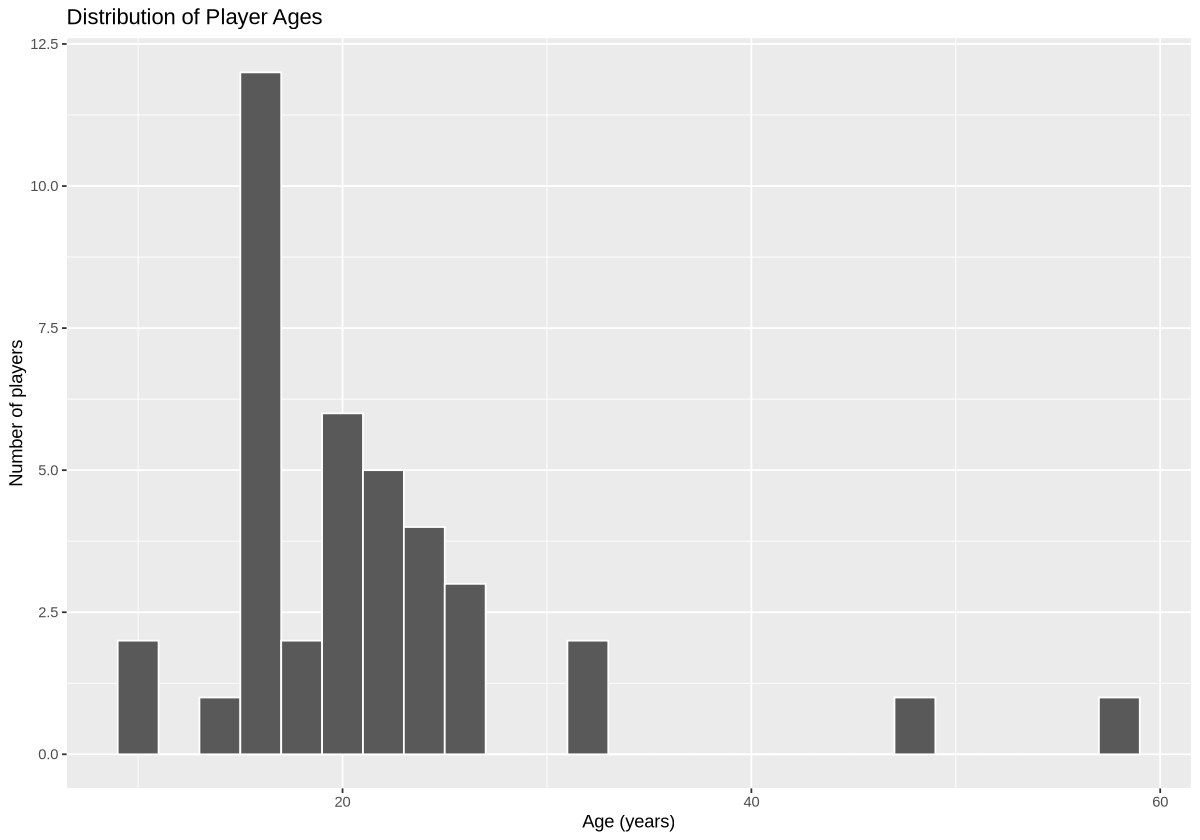

In [7]:
player_visualization1 <- combined_data |> ggplot(aes(x = Age)) +
geom_histogram(binwidth = 2, color = "white", na.rm = TRUE) +
labs( title = "Distribution of Player Ages", x = "Age (years)", y = "Number of players")

player_visualization1

In [11]:
player_visualization2 <- ggplot(combined_data, aes(x = gender, fill = subscribe)) +
geom_bar(position = "fill") +
labs(title = "Proportion of Subscribed Players by Gender", x = "Gender", y = "Proportion of players")

player_visualization2

ERROR while rich displaying an object: Error in `geom_bar()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'gender' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)


In [1]:
players |>
  ggplot(aes(x = played_hours, fill = subscribe)) +
  geom_histogram(position = "dodge") +
  labs(title="Play Hours by Subscription", x="Hours Played", y="Count")


##I will change it later today

ERROR: Error in ggplot(players, aes(x = played_hours, fill = subscribe)): could not find function "ggplot"


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


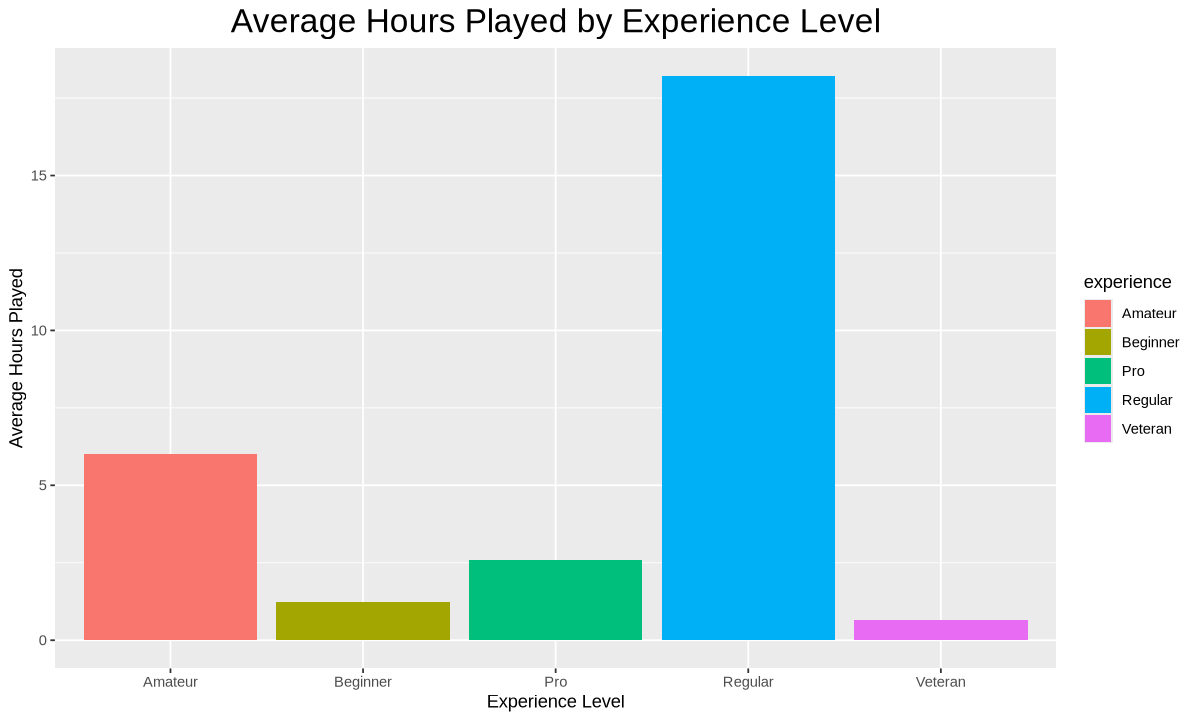

In [6]:
library(tidyverse)
players_for_viz <- read_csv("players.csv")

#relationship between experience and played hours
options(repr.plot.width = 10, repr.plot.height = 6)
experience_vs_played_hours_plot <- players_for_viz |>
                                group_by(experience) |>
                                summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
                                ggplot(aes(x = experience, y = mean_hours, fill = experience)) +
                                geom_col() +
                                labs(title = "Average Hours Played by Experience Level",
                                x = "Experience Level",
                                y = "Average Hours Played") +
                                theme(plot.title = element_text(hjust = 0.5, size = 20))
experience_vs_played_hours_plot

Players with a regular experience level have the highest played hours, this is relevant to liklihood of subscription if played hours is correlated to liklihood of subscription. 

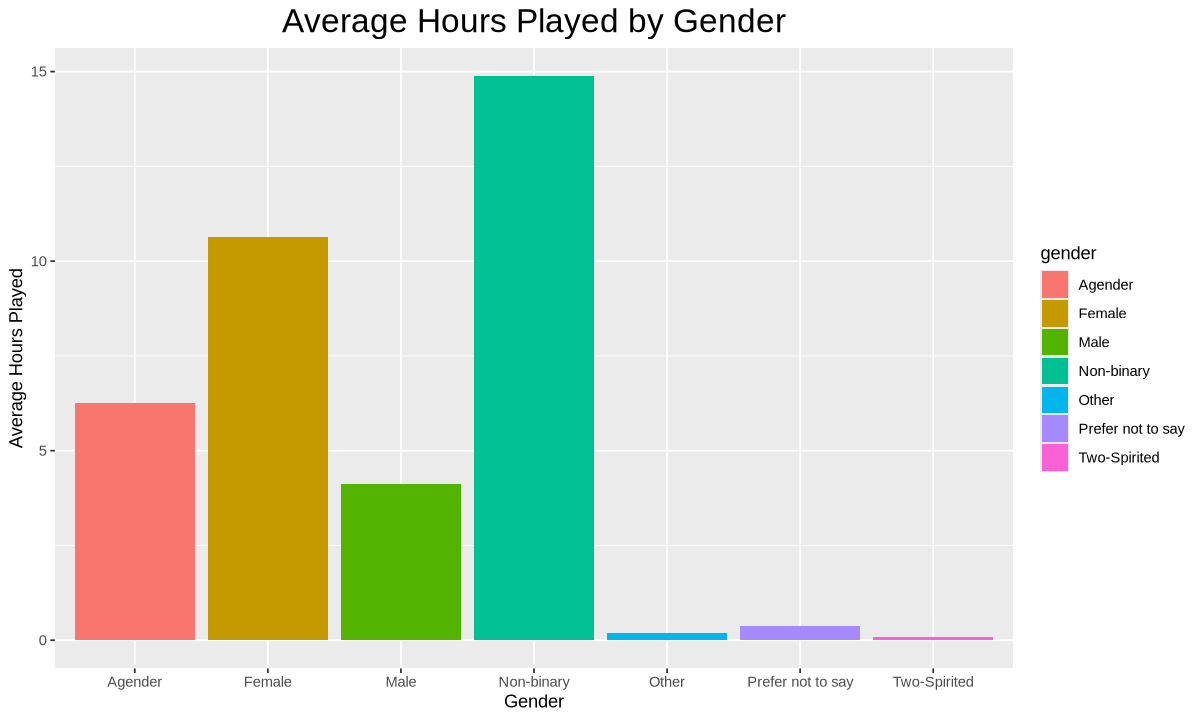

In [5]:
#relationship between gender and played hours
options(repr.plot.width = 10, repr.plot.height = 6)
gender_vs_played_hours_plot <- players_for_viz |>
                                group_by(gender) |>
                                summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
                                ggplot(aes(x = gender, y = mean_hours, fill = gender)) +
                                geom_col() +
                                labs(title = "Average Hours Played by Gender",
                                x = "Gender",
                                y = "Average Hours Played") +
                                theme(plot.title = element_text(hjust = 0.5, size = 20))
gender_vs_played_hours_plot

Players identifying at non-binary have the highest played hours, this is relevant to liklihood of subscription if played hours is correlated to liklihood of subscription.